In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re


In [2]:
phish = pd.read_csv('C:\Dataset\PROJECTS\phishing\phishing_dataset.csv')


In [3]:
phish.head()

,url_nor,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [4]:
phish.isnull().sum()

url_nor    0
type       0
dtype: int64

In [6]:
print(f"Number of duplicate rows: {phish.duplicated().sum()}")


Number of duplicate rows: 0


<Axes: xlabel='type', ylabel='count'>

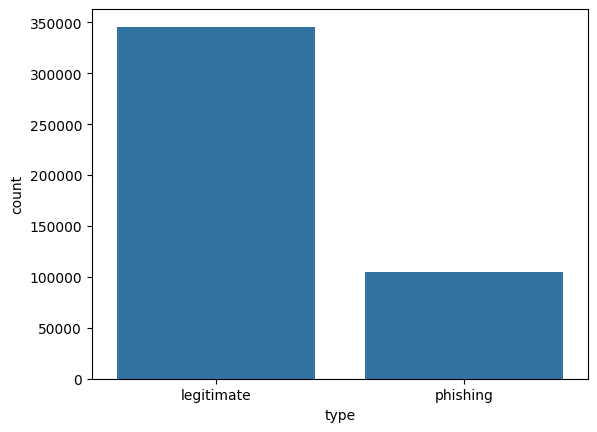

In [7]:
sns.countplot(x=phish['type'])

In [8]:
def simple_url_features(url):
    return {
        'url_length': len(url),
        'count_digits': sum(c.isdigit() for c in url),
        'count_letters': sum(c.isalpha() for c in url),
        'count_special_chars': len(re.findall(r'[^\w]', url)),
        'count_dots': url.count('.'),
        'has_https': int('https' in url),
        'has_http': int('http' in url),
        'has_at': int('@' in url),
        'has_hyphen': int('-' in url),
        'has_double_slash': int('//' in url),
        'has_suspicious_words': int(any(word in url.lower() for word in ['login', 'secure', 'bank', 'account', 'verify', 'update']))
    }


In [9]:
df = pd.read_csv(r"C:\Dataset\PROJECTS\phishing\phishing_dataset.csv")

df['url_nor'] = df['url_nor'].astype(str)  # Ensure URL is string
features_df = df['url_nor'].apply(lambda url: pd.Series(simple_url_features(url)))




In [10]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'label' column contains 'Legitimate' and 'Phishing'
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])  # 'Phishing' => 1, 'Legitimate' => 0

# Now separate features and labels
X = features_df
y = df['type']  # or df['Result']


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
rfc.score(X_test, y_test)*100

98.90599315829223

In [16]:
model = rfc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report


In [18]:
y_pred = model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     68921
           1       0.99      0.96      0.98     21115

    accuracy                           0.99     90036
   macro avg       0.99      0.98      0.98     90036
weighted avg       0.99      0.99      0.99     90036



In [19]:
def predict_url(url, model):
    features = simple_url_features(url)
    features_df = pd.DataFrame([features])
    prediction = model.predict(features_df)[0]

    return "Phishing" if prediction == 1 else "Legitimate"


In [26]:
#test_url = "https://www.yahoo.com"
#print(predict_url(test_url, rfc))

In [35]:
test_url = "https://insidethestorex.com/sd/"
#test_url = ""
print(predict_url(test_url, rfc))

Phishing


In [21]:
import pickle

with open('phishing_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as phishing_model.pkl")


Model saved as phishing_model.pkl


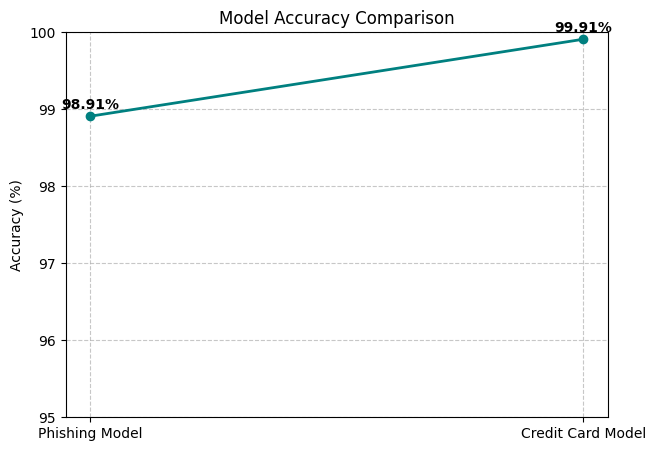

In [22]:
import matplotlib.pyplot as plt


models = ['Phishing Model', 'Credit Card Model']
accuracies = [98.91, 99.91]  

plt.figure(figsize=(7, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='teal', linewidth=2)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.1, f'{acc}%', ha='center', fontweight='bold')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(95, 100)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('model_accuracy_comparison.png')
plt.show()
